# UBC Scientific Software Seminar
## Winter 2017
### Seminar 1: Multilayer Perceptrons (January 20, 2017)

## 1. Review simple machine learning problems and `sklearn` API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear regression

In [10]:
N = 500
# a row is sample, a column is a feature
X = 10*np.random.rand(N,1)
# target
y = 2 + 3*X + 2*np.random.randn(N,1)

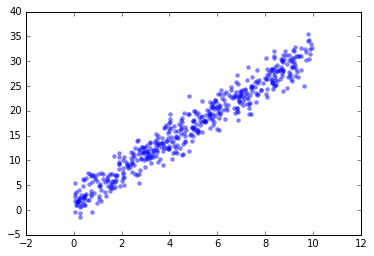

In [11]:
plt.scatter(X, y, lw=0, alpha=.5);

In [12]:
from sklearn.linear_model import LinearRegression as LR

In [13]:
reg = LR()

In [14]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
reg.coef_

array([[ 3.03214823]])

In [16]:
reg.intercept_

array([ 1.90433591])

In [19]:
Xtest = np.linspace(0, 10)
ypred = reg.predict(Xtest.reshape(-1,1))

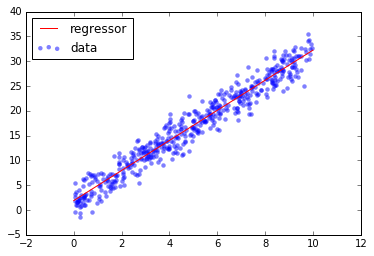

In [23]:
plt.scatter(X, y, lw=0, alpha=.5);
plt.plot(Xtest, ypred, 'r');
plt.legend(['regressor', 'data'], loc='upper left')

## Clustering example

In [24]:
from sklearn.datasets import load_sample_image

In [25]:
img = load_sample_image('flower.jpg')

(427, 640, 3)


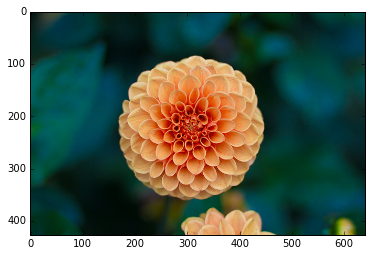

In [32]:
plt.imshow(img)
print(img.shape)

In [35]:
img[213,320,:]

array([143,   1,   0], dtype=uint8)

In [36]:
img_as_floats = np.array(img, dtype=np.float64) / 255.

In [37]:
img_as_floats[200, 300,:]

array([ 0.40784314,  0.        ,  0.05098039])

In [38]:
h,w,d = img_as_floats.shape
colour_data = img_as_floats.reshape(h*w, d)

In [41]:
colour_data[:5]

array([[ 0.00784314,  0.0745098 ,  0.05098039],
       [ 0.01176471,  0.07058824,  0.05098039],
       [ 0.02745098,  0.07843137,  0.05098039],
       [ 0.03137255,  0.08235294,  0.05490196],
       [ 0.02352941,  0.08235294,  0.05490196]])

In [42]:
from sklearn.cluster import KMeans

In [71]:
clf = KMeans(n_clusters=5)

In [72]:
from sklearn.utils import shuffle

In [73]:
colour_data.shape

(273280, 3)

That's a lot. Instead, take only the first 2000. 

In [74]:
random_colours = shuffle(colour_data)[:2000]

In [75]:
clf.fit(random_colours)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
new_image = np.array([clf.cluster_centers_[j] for j in clf.predict(colour_data)]).reshape(h,w,d)

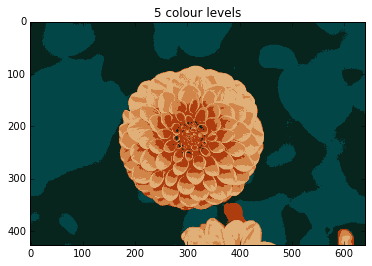

In [79]:
plt.imshow(new_image)
plt.title('5 colour levels');

## 2. Neural Networks

A neural network (a multilayer perceptron feedforward neural network) is a function $F$ which is a composition of function $F_i$
$$ 
F(\mathbf {x}; W, b) = (F_L \circ \cdots \circ F_1)(\mathbf{x})
$$
where each layer is of the form
$$
F_i (\mathbf{a}^\ell; W^{\ell}, b^\ell) = \sigma(W^\ell a^\ell + b^\ell)
$$
where $W$ is a matrix called the *weights* and $b$ is a vector called the bias and 
$$
\sigma (z) = \frac{1}{1 + \exp(-z)}
$$
is the sigmoid function.